In [456]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [457]:
InsureDF =  pd.read_csv("insurance.csv")  #Import the Insurance dataset

In [458]:
InsureDF.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<H2><B>Question 3a: Shape of the Data </B></H2>

In [459]:
InsureDF.shape  #Shape of the imported dataset

(1338, 7)

<H2><B>Question 3b: Datatype of each attribute </B></H2>

In [460]:
InsureDF.dtypes  #Check the datatype attribute of the imported dataset

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [461]:
#Change sex to a categorical variable
InsureDF['sex'] = InsureDF['sex'].astype('category')

In [462]:
InsureDF['smoker'] = InsureDF['smoker'].astype('category')

In [463]:
InsureDF['region'] = InsureDF['region'].astype('category')

In [464]:
InsureDF.dtypes #datatypes of each attribute

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [465]:
InsureDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null category
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null category
region      1338 non-null category
charges     1338 non-null float64
dtypes: category(3), float64(2), int64(2)
memory usage: 46.2 KB


In [466]:
InsureDF.duplicated().sum()  #Check for duplicates

1

In [467]:
InsureDF[InsureDF.duplicated()]  #check which row is duplicated.  Observe the same in dataset in excel

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [468]:
InsureDF = InsureDF.drop_duplicates()  #It is redundant and hence dropped it. 

In [469]:
InsureDF.duplicated().sum()

0

<H2><B>Question 3c: Checking presence of missing values </B></H2>

In [470]:
InsureDF.isnull().sum().sum() #There is no missing values in any field.  I have also verified the excel dump visually(by filtering) for all field level incorrect values as it is a limited dataset. Hence skipping field level check here.

0

<H2><B>Question 3d: 5 Point Summary of numerical attributes</B></H2>

In [471]:
InsureDF.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


Lower Limit:  25%	27.000000	26.290000	0.000000	4746.344000
upper Limit:  75%	51.000000	34.700000	2.000000	16657.717450
Median:       50%   39.000000	30.400000	1.000000	9386.161300
Mean :              39.222139	30.663452	1.095737	13279.121487
Std:                14.044333	6.100468	1.205571	12110.359656
    
Right skewness is high for charges as mean falls to the right of the median.  Outliers seems to be more at the right.


<H2><B>Question 3e: Distribution of 'bmi','age' and 'charges' columns </B></H2>

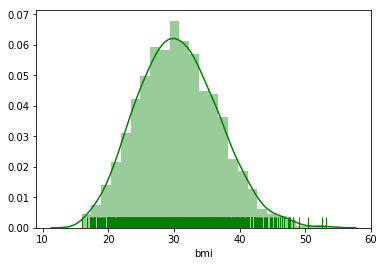

In [472]:
sns.distplot(InsureDF['bmi'],hist = 'True', rug = 'True',color = 'green')

In [ ]:
#Looks like normalized curve with tail on both sides. right tail is long than left tail.

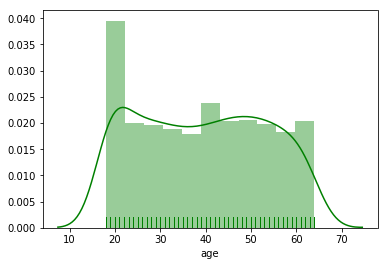

In [473]:
sns.distplot(InsureDF['age'],hist = 'True',rug = 'True',color = 'green')

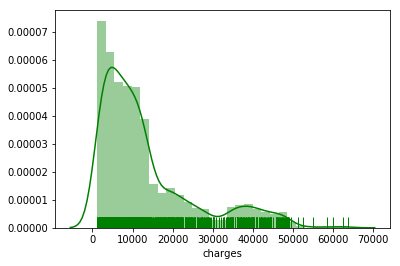

In [474]:
sns.distplot(InsureDF['charges'],hist = 'True',rug = 'True',color = 'green')

In [ ]:
#distribution is skewed with long right tail.

<H2><B>Question 3f: Measure the skewness of 'bmi','age' and 'charges' columns </B></H2>

In [475]:
print(InsureDF['bmi'].skew())
print(InsureDF['age'].skew())
print(InsureDF['charges'].skew())  #charges are highly right skewed.

0.28391419385321137
0.054780773126998195
1.5153909108403483


In [ ]:
All are positively skewed.

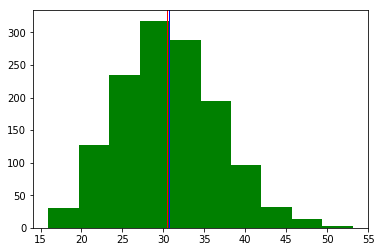

In [476]:
plt.hist(InsureDF['bmi'], color='g') # plots a simple histogram
plt.axvline(InsureDF['bmi'].mean(), color='b', linewidth=1)
plt.axvline(InsureDF['bmi'].median(), color='r', linestyle='-', linewidth=1)

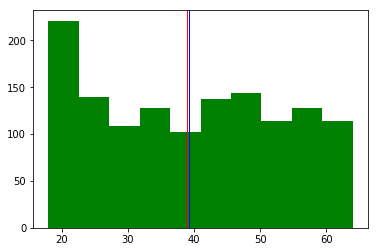

In [477]:
plt.hist(InsureDF['age'], color='g') # plots a simple histogram
plt.axvline(InsureDF['age'].mean(), color='b', linewidth=1)
plt.axvline(InsureDF['age'].median(), color='r', linestyle='-', linewidth=1)

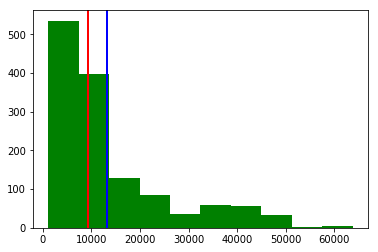

In [478]:
plt.hist(InsureDF['charges'], bins = 10, color='g') # plots a simple histogram
plt.axvline(InsureDF['charges'].mean(), color='b', linewidth=2)
plt.axvline(InsureDF['charges'].median(), color='r', linestyle='-', linewidth=2)

<H2><B> Question 3g: Checking the presence of outliers in 'bmi', 'age' and 'charges' columns </B></H2>

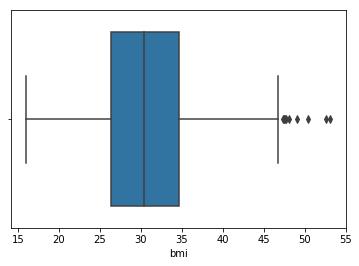

In [479]:
sns.boxplot(InsureDF['bmi'])  # we could see outliers in the right
plt.show()

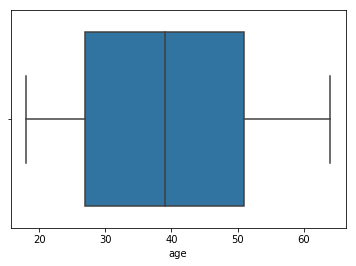

In [480]:
sns.boxplot(InsureDF['age'])  #There is no outliers
plt.show()

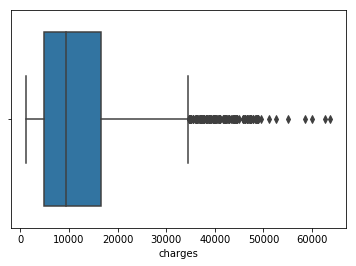

In [481]:
sns.boxplot(InsureDF['charges'])  #there is large number of outliers in the right side.
plt.show()

<H2><B>Question 3h: Distribution of Categorical columns (include children) </B></H2>

In [482]:
pd.crosstab(InsureDF['sex'], InsureDF['smoker'])
#Gents smoke more than ladies

smoker,no,yes
sex,,
female,547,115
male,516,159


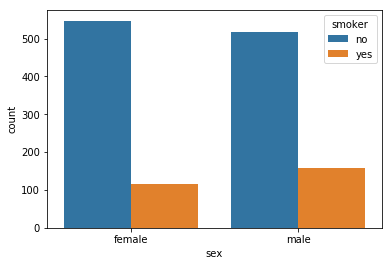

In [483]:
sns.countplot(data = InsureDF, x='sex', hue='smoker')

In [484]:
pd.crosstab(InsureDF['children'], InsureDF['smoker'] )
#People who dont have kids smoke more and it is in negatively related with increase in children.

smoker,no,yes
children,,
0,458,115
1,263,61
2,185,55
3,118,39
4,22,3
5,17,1


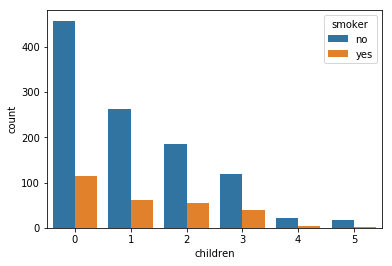

In [485]:
sns.countplot(data = InsureDF, x='children', hue='smoker')

In [486]:
pd.crosstab(InsureDF['region'], InsureDF['smoker'] )
#People in the east region smoke more.

smoker,no,yes
region,,
northeast,257,67
northwest,266,58
southeast,273,91
southwest,267,58


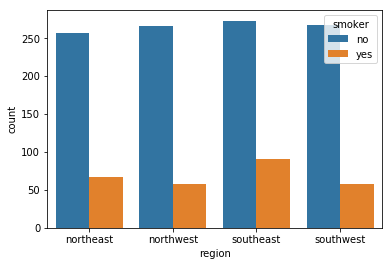

In [487]:
sns.countplot(data = InsureDF, x='region', hue='smoker')

In [488]:
pd.crosstab(InsureDF['sex'], InsureDF['region'])

region,northeast,northwest,southeast,southwest
sex,,,,
female,161,164,175,162
male,163,160,189,163


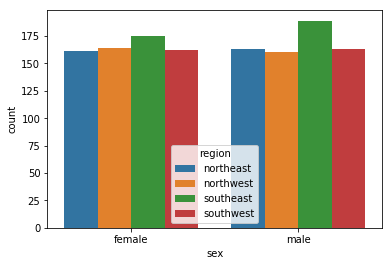

In [489]:
sns.countplot(data = InsureDF, x='sex', hue='region')

In [490]:
pd.crosstab(InsureDF['sex'], InsureDF['children'])
#Since we dont whether we have married couple, single mothers etc, we cannot derive anything out of this distribution

children,0,1,2,3,4,5
sex,,,,,,
female,289,158,119,77,11,8
male,284,166,121,80,14,10


In [491]:
InsureDF_1 = InsureDF.copy()

In [492]:
#applying label encoding 
from sklearn.preprocessing import LabelEncoder
InsureDF_1.iloc[:, 1] = LabelEncoder().fit_transform(InsureDF_1.iloc[:, 1])
InsureDF_1.iloc[:, 4] = LabelEncoder().fit_transform(InsureDF_1.iloc[:, 4])
InsureDF_1.iloc[:, 5] = LabelEncoder().fit_transform(InsureDF_1.iloc[:, 5])

In [493]:
InsureDF_1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [494]:
InsureDF_2 = InsureDF.copy()

In [495]:
#Dataframe 3 and 4 - InsureDF_3 and InsureDF_4 are applied with dummies on region
InsureDF_3 = pd.get_dummies(InsureDF_2.iloc[:,5])

In [496]:
InsureDF_3.head(2)

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0


In [497]:
InsureDF_4 = pd.concat([InsureDF_2,InsureDF_3],axis = 1)

In [498]:
InsureDF_4 = InsureDF_4.drop(['region'],axis = 1)

In [499]:
InsureDF_4.head(2)  #I am not dropping 4th dummy in region as there are limited data. This data frame will not be used for any calculation purpose. 

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,female,27.90,0,yes,16884.9240,0,0,0,1
1,18,male,33.77,1,no,1725.5523,0,0,1,0


<H2><B>Question 3i: Pairplot that includes all the columns of the dataframe </B></H2>

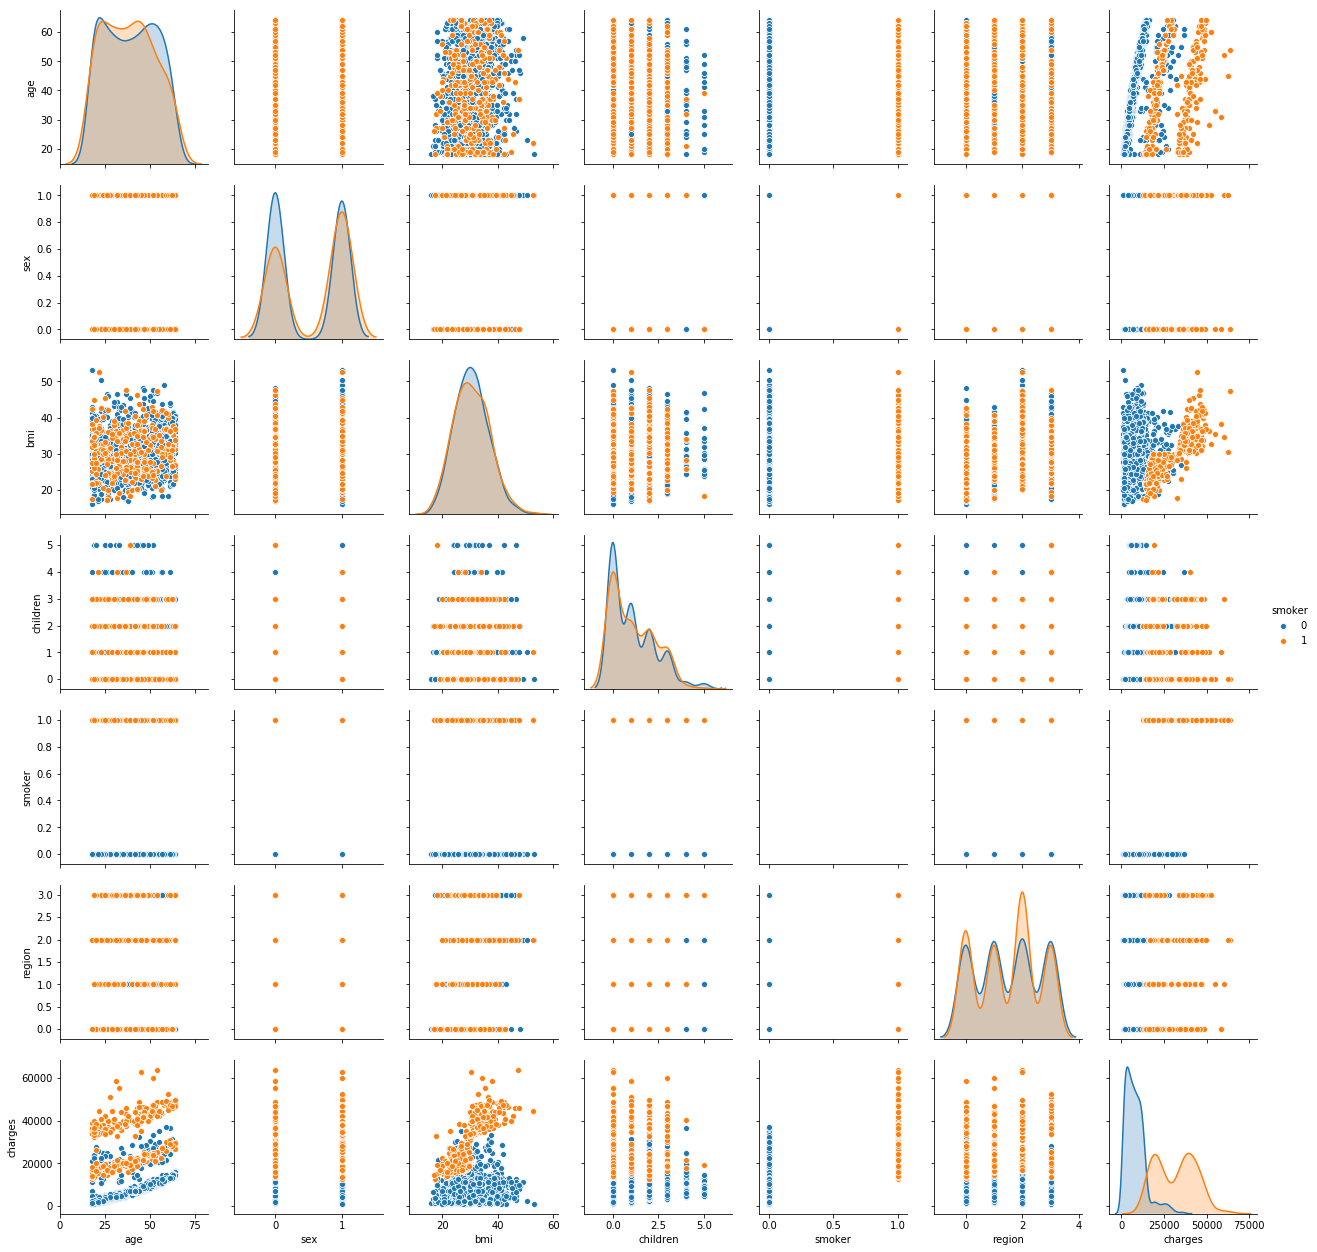

In [500]:
sns.pairplot(InsureDF_1, hue = 'smoker')  #Displays all the columns of the dataframe

In [ ]:
Observation:
1. People with more children are less likely to smoke
2. As age increases, insurance charges increases.
3. Charges for Smokers are higher than nonsmoker
4. Overlapping process in regions say there are both smoker and nonsmoker. However, in one region, the smokers are high as identified by a high peak.



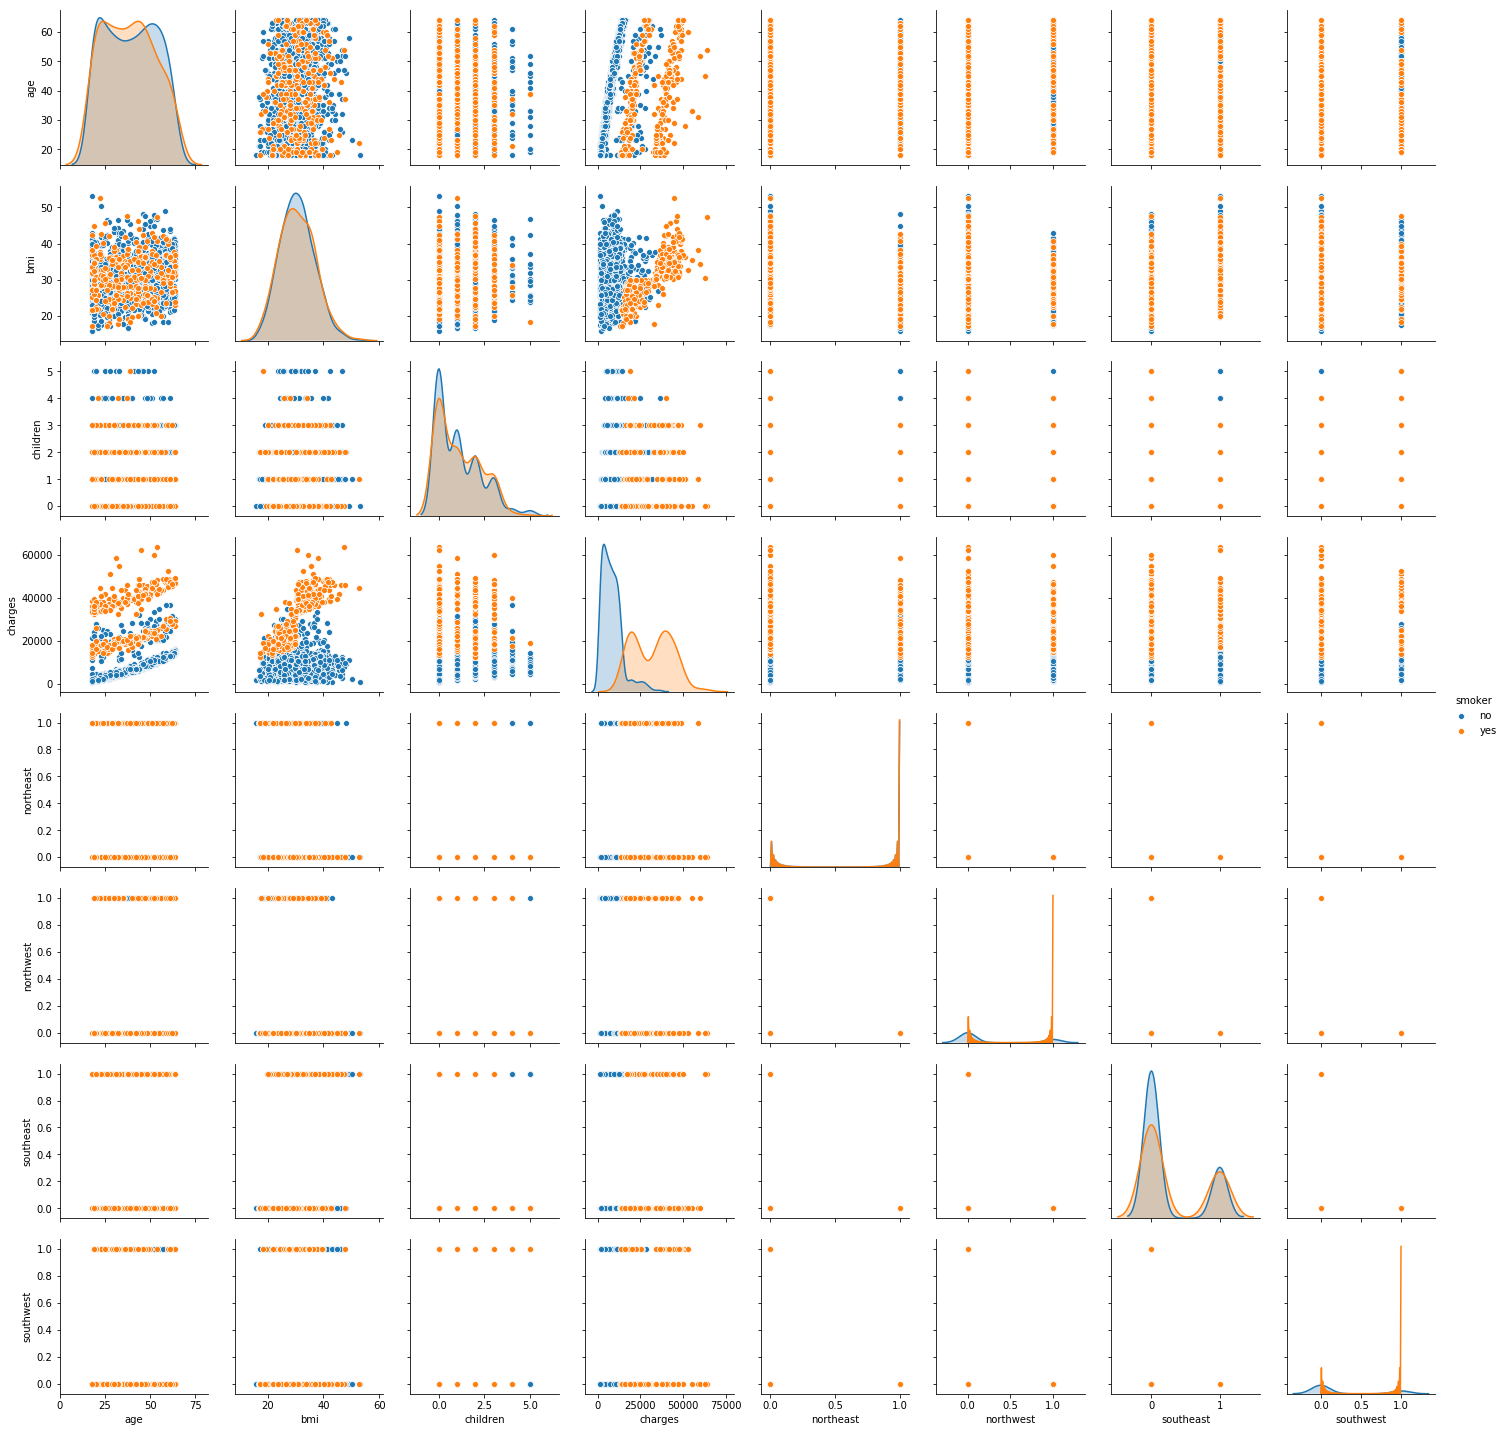

In [501]:
sns.pairplot(InsureDF_4, hue = 'smoker')  #Using region dummies. 

In [ ]:
Observation: Smokers are high in north region.  Hence the charges will be higher in north east and north west.
    

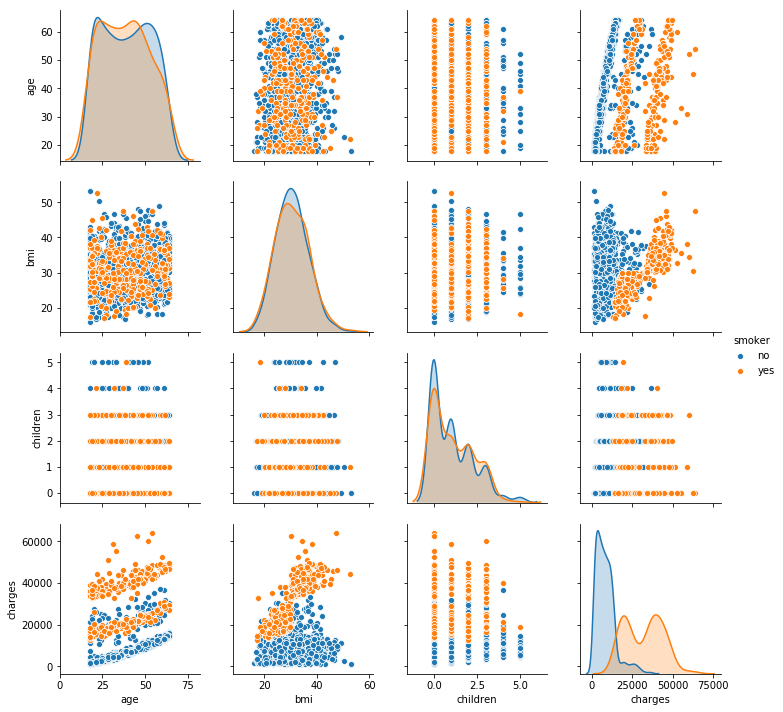

In [502]:
sns.pairplot(InsureDF, hue = 'smoker')  #Only numerical columns

<H2><B>Question 4: Answer the following with statistical evidence </B></H2>


<H3> Assumption : P = 0.05 For all the below statistical proofs. </H3>

<H2><B>Question 4a: Do charges of people who smoke differ significantly from the people who don't </B></H2>

H0 :  Charges of Non smoking  = Charges of Smoking  (Null hypothesis) <Br>
HA :  Charges of Non smoking  $\neq$ Charges of Smoking (Alternative hypothesis)

In [503]:
#Performing mannwhitneyu test as the data is not normalized. 
from scipy.stats import mannwhitneyu
NonSmokerCharges = InsureDF[InsureDF_1['smoker'] == 0]['charges']



In [504]:
SmokerCharges = InsureDF[InsureDF_1['smoker'] == 1]['charges']

In [505]:
u, p_value = mannwhitneyu(NonSmokerCharges,SmokerCharges)
print(u,p_value)

7403.0 2.87350594119607e-130


since p_value < 0.05, we reject null hypothesis.  Hence there is a significant difference in charges between smoker vs nonsmokers.

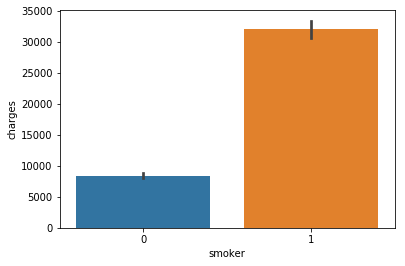

In [507]:
sns.barplot(data = InsureDF_1,x='smoker', y = 'charges')


<H2><B>Question 4b: Does bmi of males differ significantly from that of the females? </B></H2>

In [508]:
#Performing independent t test for this question. 
from scipy.stats import ttest_ind
Male_bmi = InsureDF_1[InsureDF_1['sex'] == 1]['bmi']
female_bmi = InsureDF_1[InsureDF_1['sex'] == 0]['bmi']


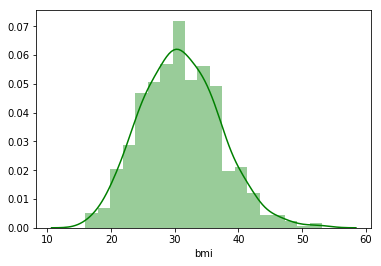

In [509]:
sns.distplot(Male_bmi, kde = 'True', color = 'g')

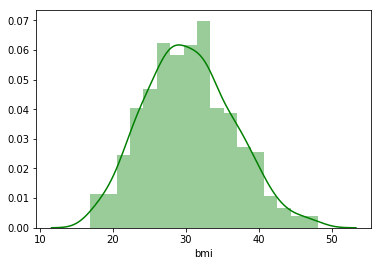

In [510]:
sns.distplot(female_bmi, kde = 'True', color = 'g')

Ho : Bmi (Males) = Bmi (Females) <br>
HA : Bmi (Males) $\neq$ Bmi (Females)

In [511]:
t_statistic, p_value  =  ttest_ind(Male_bmi,female_bmi)   #Applying ttest before zscore
print('P Value %1.5f' % p_value) 

P Value 0.08992


In [512]:
from scipy.stats import zscore
Male_bmi1 = zscore(Male_bmi)
female_bmi1 = zscore(female_bmi)

In [513]:
t_statistic, p_value  =  ttest_ind(Male_bmi1,female_bmi1)  #applying ttest after zscore as the bmi column is skewed.
print('P Value %1.5f' % p_value) 

P Value 1.00000


p>0.05, hence we accept null hypothesis. There is no difference between the bmi of male and female.

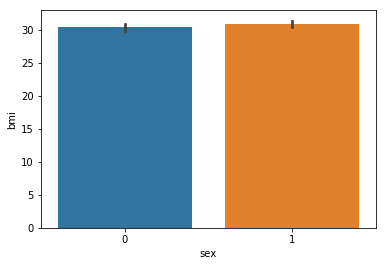

In [515]:
sns.barplot(data = InsureDF_1,x='sex', y = 'bmi')

<H2><B>Question 4c: Is there a proportion of smokers significantly different in different genders </B></H2>

H0: Proportion of smokers in both genders are equal.
HA: Proportion of smokers in both genders are signficantly different or not equal. 

In [516]:
MaleDF = InsureDF_1[InsureDF_1.sex == 1]
FemaleDF = InsureDF_1[InsureDF_1.sex == 0]

In [517]:
MaleDF.head()

,age,sex,bmi,children,smoker,region,charges
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
8,37,1,29.830,2,0,0,6406.41070


In [518]:
FemaleDF.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.92400
5,31,0,25.74,0,0,2,3756.62160
6,46,0,33.44,1,0,2,8240.58960
7,37,0,27.74,3,0,1,7281.50560
9,60,0,25.84,0,0,1,28923.13692


In [519]:
TotalMale,TotalFemale = InsureDF_2['sex'].value_counts()
TotalMale, TotalFemale

(675, 662)

In [520]:
S = InsureDF_2.groupby(['sex','smoker']).size()

In [521]:
S

sex     smoker
female  no        547
        yes       115
male    no        516
        yes       159
dtype: int64

In [522]:
from statsmodels.stats.proportion import proportions_ztest

In [523]:
#For Female Candidate:  (By observing the above value of S)
count = 115
nobs = 662
value = 0
FZstat, Fpval = proportions_ztest(count, nobs, value)
FZstat,Fpval

(11.797344230622215, 4.0282472888677445e-32)

In [524]:
#for Male candidate: (By observing the above value of S)
count = 159
nobs = 675
value = 0
MZstat, Mpval = proportions_ztest(count, nobs, value)
MZstat,Mpval

(14.42200353787613, 3.762593825693404e-47)

In [525]:
Fpval - Mpval  #Difference in the proportion of smokers. 

4.0282472888677406e-32

In [ ]:
There is significant difference in the proportion of smokers based on Gender.

<H2><B>Question 4d: Is the distribution of bmi across women with no children, one child and two children, the same? </B></H2>

H0 : bmi distribution (Women with no children) = bmi(women with 1 child) = bmi(women with 2 child) <Br>
HA: bmi distribution (Women with no children) $\neq$ bmi(women with 1 child) $\neq$ bmi(women with 2 child)

In [526]:
#Before performing Annova test, levene test is to be performed to find out if the annova test is required or not. 
#Levene test helps in understanding if there is any homegeneity of variance. 
from scipy.stats import levene


In [527]:
bmiC0 = FemaleDF[FemaleDF['children'] == 0]['bmi']
bmiC0.count()

289

In [528]:
bmiC1 = FemaleDF[FemaleDF['children'] == 1]['bmi']
bmiC1.count()

158

In [529]:
bmiC2 = FemaleDF[FemaleDF['children'] == 2]['bmi']
bmiC2.count()

119

In [530]:
levene(bmiC0,bmiC1,bmiC2)

LeveneResult(statistic=0.9433311607108589, pvalue=0.3899432394522804)

In [ ]:
p > 0.05, hence we accept null hypothesis.  Variance are equal across 3 groups

In [531]:
from scipy.stats import f_oneway
f_oneway(bmiC0,bmiC1,bmiC2)

F_onewayResult(statistic=0.3344720147757968, pvalue=0.7158579926754841)

In [ ]:
p > 0.05  , we accept null hypothesis.  Mean are equal across 3 groups and will be equal to population. 

H0: sample correlation coefficient, $\rho$ = 0  (no correlation)  <BR>
HA: Sample correlation coefficient, $\rho$ $\neq$ 0   (correlation exist)

In [532]:
from scipy.stats import spearmanr as sp

In [533]:
rho, pval = sp(FemaleDF['children'], FemaleDF['bmi'])

In [534]:
rho, pval

(0.018648004718281302, 0.6319840679102064)

since $\rho$ (rho) $\neq$ 0, there correlation exist between bmi and women with no children or more children